# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

## <font color = "Green"> __Importando os pacotes__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import datetime as dt

## <font color = "Green"> __Importando a base de dados__

In [2]:
base = pd.read_csv(r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo10-DescritivaII-Análisedescritivapararespostacontínua\Profissao- Cientista de Dados_M10_support material.csv")

base.tail()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39
14999,14999,2016-03-01,12895,F,True,True,0,Assalariado,Secundário,Casado,Casa,50,3.049315,2.0,False,993.86


## <font color = "Green"> __Analise exploratoria__

In [3]:
print(base.shape)
print("=" * 120)
base.info()

(15000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  boo

In [4]:
base.isnull().sum().sort_values(ascending=False)

tempo_emprego            2534
Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

## <font color = "Green"> __Tratando a base dados__

In [5]:
base["data_ref"]= pd.to_datetime(base["data_ref"])

base["Mes"] = base["data_ref"].dt.month
base["Ano"] = base["data_ref"].dt.year

## <font color = "Green"> __Realizando as analises__

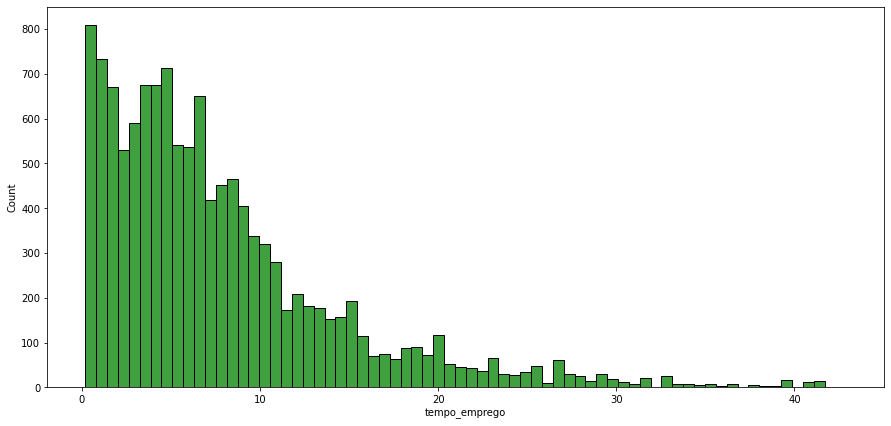

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(base["tempo_emprego"],color="g")

plt.show()

In [33]:
print("Renda media maior que 40 anos {:.2f}".format(base[base["tempo_emprego"]>40]["renda"].mean()))
print("Renda media maior que 30 anos {:.2f}".format(base[(base["tempo_emprego"]<41) & (base["tempo_emprego"]>29)]["renda"].mean()))
print("Renda media maior que 20 anos {:.2f}".format(base[(base["tempo_emprego"]<31) & (base["tempo_emprego"]>19)]["renda"].mean()))
print("Renda media maior que 10 anos {:.2f}".format(base[(base["tempo_emprego"]<21) & (base["tempo_emprego"]>9)]["renda"].mean()))
print("Renda media menor que 10 anos {:.2f}".format(base[base["tempo_emprego"]<10]["renda"].mean()))

Renda media maior que 40 anos 22875.07
Renda media maior que 30 anos 13287.34
Renda media maior que 20 anos 9482.91
Renda media maior que 10 anos 5877.13
Renda media menor que 10 anos 4004.45


In [8]:
pd.DataFrame(base["posse_de_veiculo"].value_counts())

,posse_de_veiculo
False,9167
True,5833


In [9]:
pd.DataFrame(base.groupby(["posse_de_veiculo"])["renda"].sum())

,renda
posse_de_veiculo,
False,40247777.33
True,29121716.86


In [10]:
pd.DataFrame(base.groupby(["posse_de_veiculo"])["renda"].count())

,renda
posse_de_veiculo,
False,9167
True,5833


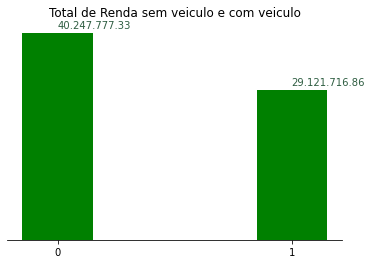

In [11]:
x = base.groupby(["posse_de_veiculo"])["renda"].sum().index
y = base.groupby(["posse_de_veiculo"])["renda"].sum().values
fig, ax = plt.subplots()
a = len(x)
for i in range(0,a):
    plt.annotate(
    "{:,.2f}".format(y[i]).replace(",","."),
        (x[i],y[i]),
        color = "#2E5D41",
        xytext=(0,5),
        textcoords = "offset points"
    )
    
    
plt.bar(x,y,width=0.3,color="g")
plt.xticks(list(x))
ax.yaxis.set_visible(False) #Titando rotulo do eixo y e tambem o titulo
ax.spines["top"].set_visible(False) # Titando a linha de cima
ax.spines["left"].set_visible(False) # Titando a linha lado esquerdo
ax.spines["right"].set_visible(False) # Titando a linha do lçado direito
plt.title("Total de Renda sem veiculo e com veiculo")
plt.show()

In [12]:
base.corr().drop("Unnamed: 0",axis=1)

,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,Mes,Ano
Unnamed: 0,-0.001868,0.002567,0.004003,0.015612,-0.004328,-0.002146,0.016628,0.019061,0.007646,0.274272,0.692820
index,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740,0.012827,-0.011648
posse_de_veiculo,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414,-0.000069,0.002188
posse_de_imovel,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827,-0.002143,0.004828
qtd_filhos,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567,0.014263,0.003331
idade,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570,0.004299,-0.007128
tempo_emprego,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235,-0.014131,0.008641
qt_pessoas_residencia,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977,0.017432,0.001771
mau,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577,-0.001475,0.018028
renda,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000,-0.014922,0.018109


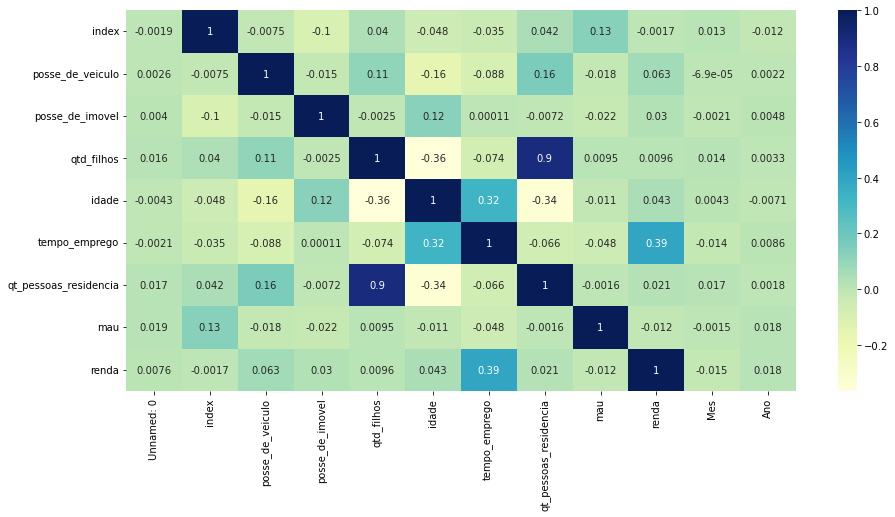

In [13]:
# Analise de correlação
fig, ax = plt.subplots(figsize=[15,7])
sns.heatmap(base.corr().drop(["Unnamed: 0","Mes","Ano"]),annot=True,cmap = "YlGnBu")
plt.show()

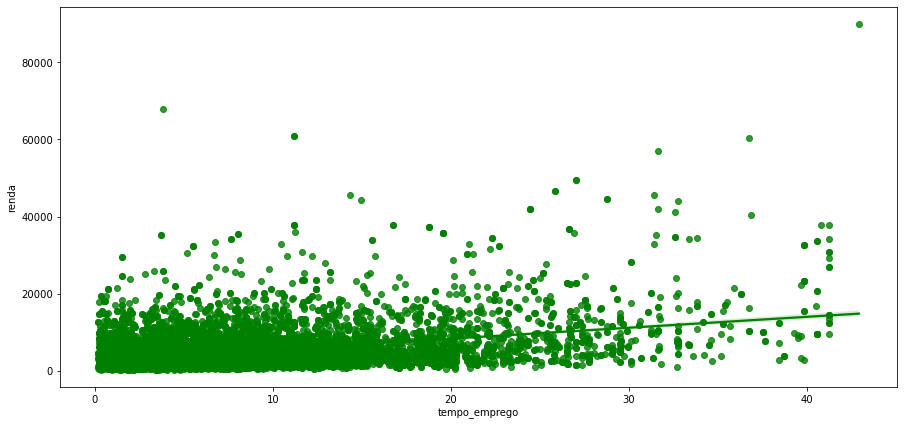

In [14]:
# Graficos de dispesão com  linha de tendencia
fig, ax = plt.subplots(figsize=[15,7])

sns.regplot(data=base,x="tempo_emprego",y="renda",color="g")
plt.show()


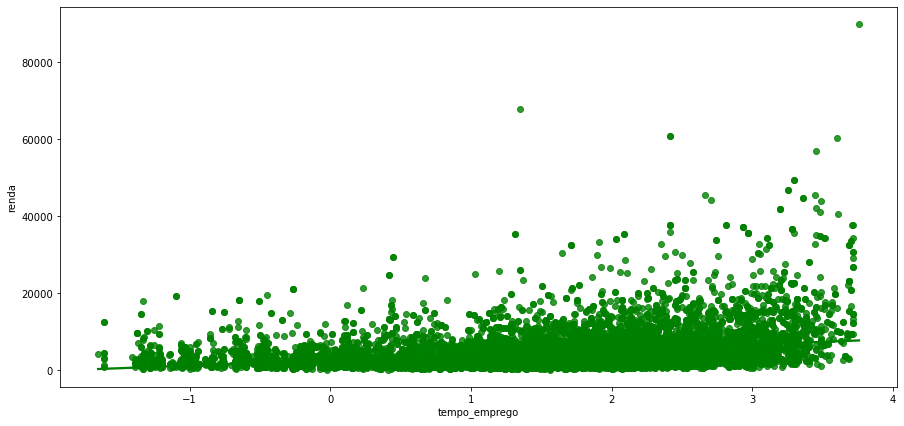

In [15]:
# Graficos de dispesão com  linha de tendencia
fig, ax = plt.subplots(figsize=[15,7])

sns.regplot(data=base,x=np.log(base["tempo_emprego"]),y="renda",color="g")
plt.show()

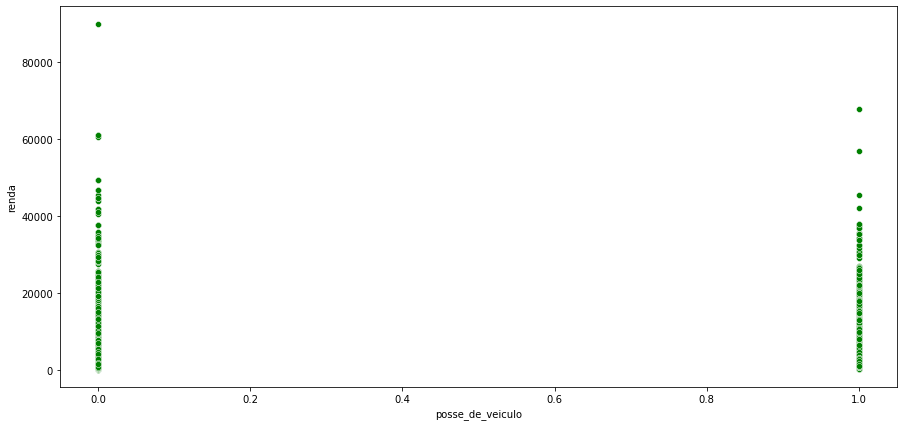

In [16]:
fig, ax = plt.subplots(figsize=[15,7])

sns.scatterplot(data=base,x="posse_de_veiculo",y="renda",color="g")
plt.show()


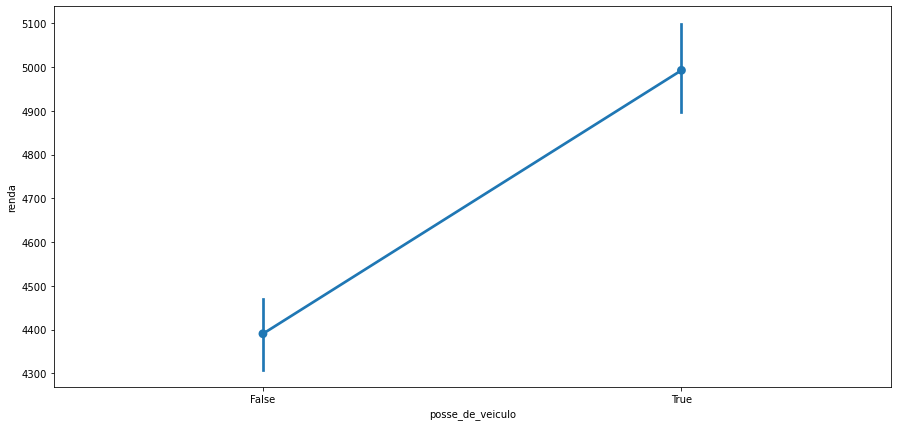

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
sns.pointplot(data=base,
                   x="posse_de_veiculo",
                   y="renda",
                  #dodge=True,
                  ci=90 
                  
            
                  )
#plt.legend()

plt.show()

In [18]:
base[base["posse_de_veiculo"]==True].groupby("posse_de_veiculo").mean()

,Unnamed: 0,index,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,Mes,Ano
posse_de_veiculo,,,,,,,,,,,
True,7513.433739,8253.363278,0.663466,0.540202,41.619578,7.054953,2.399451,0.020744,4992.579609,5.599691,2015.201097


In [19]:

print("R${:,.2f} media salarial com veiculo".format(base[base["posse_de_veiculo"]==True]["renda"].mean()).replace(",","."))

print("R${:,.2f} media salarial sem veiculo".format(base[base["posse_de_veiculo"]==False]["renda"].mean()).replace(",","."))

R$4.992.58 media salarial com veiculo
R$4.390.51 media salarial sem veiculo


## <font color = "Green"> __Respondendo as perguntas de negorcios__

- Na minha opnião a variavel tempo de emprego é sim uma variavel interessante levando em consideração que quanto maior o tempo de emprego maior a renda.
- Ja a variavel possse de veiculo por exemplo na correlaçao com a renda por exemplo a relação dela é bem fraca, mas quando fazemos a analise media das rendas com e sem imoveis vemos que a media de renda de quem tem imovel é maior de quem não tem imovel. 